# Cleaning Data from New Bedford and Fairhaven Deployments
This repository takes in all of the datafiles from the New Bedford and Fairhaven deployments, aggregates, and cleans the data.

Note that the aligning of the data is done by hand. The specific way timestamps are handled can been seen in the the `sensor_cleaning.py` file that is included in this repository.

Further note, that there are two locations that have been targeted in this deployment: Fairhaven and New Bedford. New Bedford will reference the large effluent plume at the point. Fairhaven will reference the smaller effluent outflow site in the harbor.

In [1]:
# required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sensor_cleaning as sc
from IPython.display import display
import gpxpy

%matplotlib inline

pd.set_option('display.max_columns',None)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 32

In [2]:
####### Please note! These files are not included in the repository.
####### To get copies of these files, please contaxt vpreston@whoi.edu

#raw data file extensions
ctd = 'data/ctd/ctd_data.txt'

gga = 'data/gga/gga_329_data.txt'

opa = 'data/op/optode_20180329181123.txt'
opb = 'data/op/optode_20180329192656.txt'
opc = 'data/op/optode_20180329204400.txt'
opd = 'data/op/optode_20180329211740.txt'
ope = 'data/op/optode_20180329213909.txt'
opf = 'data/op/optode_20180329223353.txt'
opg = 'data/op/optode_20180329230511.txt'

nit = 'data/nitrate/A0066336.csv'
nita = 'data/nitrate/suna_20180329181159.txt'
nitb = 'data/nitrate/suna_20180329181205.txt'
nitc = 'data/nitrate/suna_20180329191218,txt'
nitd = 'data/nitrate/suna_20180329204441.txt'

aira = 'data/airmar/airmar_20180329181245.txt'
airb = 'data/airmar/airmar_20180329191141.txt'
airc = 'data/airmar/airmar_20180329204336.txt'
aird = 'data/airmar/airmar_20180329213838.txt'
aire = 'data/airmar/airmar_20180329221731.txt'
airf = 'data/airmar/airmar_20180329230448.txt'

# a different parser is used for the gpx data. Please change this filepath
# to reflect where this is stored on the local machine
pix = '/home/vpreston/Documents/IPP/nb-effluent-plumes/data/pix/43.log.gpx'

## Cleaning the Data

,Time,Conductivity,Temperature,Pressure,Sea pressure,Depth,Salinity,Speed of sound,Specific conductivity,Density anomaly,Year,Month,Day,Hour,Minute,Second,Julian_Date,Seconds_Elapsed
9504,2018-03-29 13:19:12.000,28.058638,5.507255,10.996522,0.864022,0.856976,28.378760,1464.405808,44701.527344,22.382645,2018,3,29,13.0,19.0,12.0,2.458207e+06,2553552.0
9505,2018-03-29 13:19:12.500,28.064775,5.501920,10.993600,0.861100,0.854077,28.390107,1464.398287,44718.563858,22.392158,2018,3,29,13.0,19.0,12.5,2.458207e+06,2553552.5


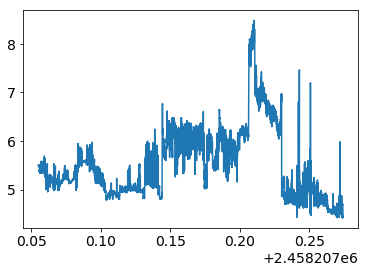

In [8]:
# CTD
ctd_df = pd.read_table(ctd, delimiter=',', header=0)
ctd_df = sc.clean_ctd(ctd_df)

# let's only grab relevant information
ctd_df = ctd_df.drop(ctd_df[ctd_df.Julian_Date < (0.055+2458207)].index)
ctd_df = ctd_df.drop(ctd_df[ctd_df.Julian_Date > (0.274+2458207)].index)
ctd_df = ctd_df.dropna()

# further, there are two sites of interest; let's grab those seperately as well
ctd_fh = ctd_df.drop(ctd_df[ctd_df.Julian_Date > (0.205+2458207)].index)
ctd_nb = ctd_df.drop(ctd_df[ctd_df.Julian_Date < (0.231+2458207)].index)

plt.plot(ctd_df['Julian_Date'], ctd_df['Temperature'])
ctd_df.head(2)

,Time,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,Julian_Date,CH4_ppm,CO2_ppm,CH4_ppm_adjusted,CO2_ppm_adjusted
4166,03/29/2018 14:19:12.941,2018,3,29,13.0,19.0,12.941,2553552.941,2.458207e+06,2.2926,410.650,1.147641,120.087103
4167,03/29/2018 14:19:13.917,2018,3,29,13.0,19.0,13.917,2553553.917,2.458207e+06,2.2953,410.278,1.151853,119.978318


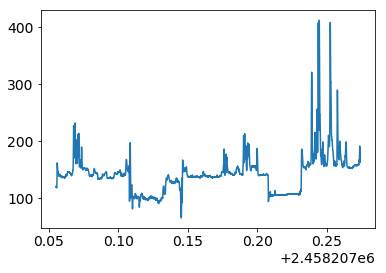

In [7]:
# GGA
gga_df = pd.read_table(gga, delimiter=', ', header=1, engine='python')
gga_df = sc.clean_gga(gga_df)

# Only keep the columns with useful information
gga_df = gga_df.loc[:,['Time',
                 'Year',
                 'Month',
                 'Day',
                 'Hour',
                 'Minute',
                 'Second',
                 'Seconds_Elapsed',
                 'Julian_Date',
                 'CH4_ppm',
                 'CO2_ppm',
                 'CH4_ppm_adjusted',
                 'CO2_ppm_adjusted']]

# get rid of junk
gga_df = gga_df.drop(gga_df[gga_df.Julian_Date < (0.055+2458207)].index)
gga_df = gga_df.drop(gga_df[gga_df.Julian_Date > (0.274+2458207)].index)
gga_df = gga_df.dropna()

# further, there are two sites of interest; let's grab those seperately as well
gga_fh = gga_df.drop(gga_df[gga_df.Julian_Date > (0.205+2458207)].index)
gga_nb = gga_df.drop(gga_df[gga_df.Julian_Date < (0.231+2458207)].index)

plt.plot(gga_df['Julian_Date'], gga_df['CO2_ppm_adjusted'])

gga_df.head(2)

,posixtime,model,SN,O2Concentration,AirSaturation,Temperature,CalPhase,TCPhase,C1RPh,C2RPh,C1Amp,C2Amp,RawTemp,Julian_Date
437,1.522333e+09,4831.0,277,425.7390,108.2564,5.551868,33.04836,3.304836E+01,4.139844E+01,8.350082E+00,888.7757,1055.159,668.6605,2.458207e+06
438,1.522333e+09,4831.0,277,426.0607,108.3061,5.540327,33.04543,3.304543E+01,4.139336E+01,8.347931E+00,888.3184,1054.925,669.0101,2.458207e+06


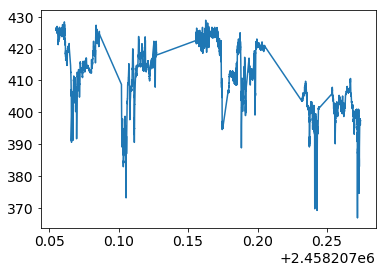

In [9]:
# optode
op_df = pd.read_table(opa, delimiter=',', header=0, engine='c')
tempb = pd.read_table(opb, delimiter=',', header=0, engine='c')
tempc = pd.read_table(opc, delimiter=',', header=0, engine='c')
tempd = pd.read_table(opd, delimiter=',', header=0, engine='c')
tempe = pd.read_table(ope, delimiter=',', header=0, engine='c')
tempf = pd.read_table(opf, delimiter=',', header=0, engine='c')
tempg = pd.read_table(opg, delimiter=',', header=0, engine='c')

op_df = op_df.append(tempb, ignore_index=True)
op_df = op_df.append(tempc, ignore_index=True)
op_df = op_df.append(tempd, ignore_index=True)
op_df = op_df.append(tempe, ignore_index=True)
op_df = op_df.append(tempf, ignore_index=True)
op_df = op_df.append(tempg, ignore_index=True)

op_df = sc.clean_optode(op_df)
op_df = op_df.dropna()

# limit the times
op_df = op_df.drop(op_df[op_df.Julian_Date < (0.055+2458207)].index)
op_df = op_df.drop(op_df[op_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
op_fh = op_df.drop(op_df[op_df.Julian_Date > (0.205+2458207)].index)
op_nb = op_df.drop(op_df[op_df.Julian_Date < (0.231+2458207)].index)

plt.plot(op_df['Julian_Date'], op_df['O2Concentration'])
op_df.head(2)

/home/vpreston/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/vpreston/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,lat,lon,lat_mod,lon_mod,Julian_Date,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed,COG_T,SOG_K,pressure_B,wind_dir_T,wind_speed_M,rateofturn
387,4138.3258,7054.4446,41.638763,-70.907410,2.458207e+06,2018,3,29,13.0,19.0,12.9,2553552.9,264.5,1.1,1.0182,173.0,2.1,0
388,4138.3258,7054.4447,41.638763,-70.907412,2.458207e+06,2018,3,29,13.0,19.0,13.9,2553553.9,260.5,1.1,1.0184,175.4,1.9,0
389,4138.3258,7054.4448,41.638763,-70.907413,2.458207e+06,2018,3,29,13.0,19.0,14.9,2553554.9,260.2,0.9,1.0184,173.6,1.6,0
390,4138.3259,7054.4449,41.638765,-70.907415,2.458207e+06,2018,3,29,13.0,19.0,15.9,2553555.9,256.9,0.9,1.0185,172.4,1.9,0
391,4138.3259,7054.4450,41.638765,-70.907417,2.458207e+06,2018,3,29,13.0,19.0,16.9,2553556.9,255.9,0.7,1.0184,168.8,1.7,0


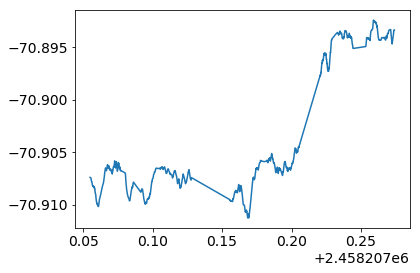

In [10]:
#airmar
air_df = pd.read_table(aira, delimiter=',', header=0, engine='python')
tempb = pd.read_table(airb, delimiter=',', header=0, engine='python')
tempc = pd.read_table(airc, delimiter=',', header=0, engine='python')
tempd = pd.read_table(aird, delimiter=',', header=0, engine='python')
tempe = pd.read_table(aire, delimiter=',', header=0, engine='python')
tempf = pd.read_table(airf, delimiter=',', header=0, engine='python')

air_df = air_df.append(tempb, ignore_index=True)
air_df = air_df.append(tempc, ignore_index=True)
air_df = air_df.append(tempd, ignore_index=True)
air_df = air_df.append(tempe, ignore_index=True)
air_df = air_df.append(tempf, ignore_index=True)

# air_df.head(2)

air_df = sc.clean_airmar(air_df)
air_df = air_df.loc[:,['lat',
                       'lon',
                       'lat_mod',
                       'lon_mod',
                       'Julian_Date',
                       'Year',
                       'Month',
                       'Day',
                       'Hour',
                       'Minute',
                       'Second',
                       'Seconds_Elapsed',
                       'COG_T',
                       'SOG_K',
                       'pressure_B',
                       'wind_dir_T',
                       'wind_speed_M',
                       'rateofturn']]
air_df = air_df.dropna()

# limit the times
air_df = air_df.drop(air_df[air_df.Julian_Date < (0.055+2458207)].index)
air_df = air_df.drop(air_df[air_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
air_fh = air_df.drop(air_df[air_df.Julian_Date > (0.205+2458207)].index)
air_nb = air_df.drop(air_df[air_df.Julian_Date < (0.231+2458207)].index)

plt.plot(air_df['Julian_Date'], air_df['lon_mod'])
air_df.head(5)

,Julian_Date,0.00,Year,Month,Day,Hour,Minute,Second,Seconds_Elapsed
535,2.458207e+06,19.25,2018,3,29,13,19,13.4472,2.553553e+06
536,2.458207e+06,19.78,2018,3,29,13,19,15.7440,2.553556e+06


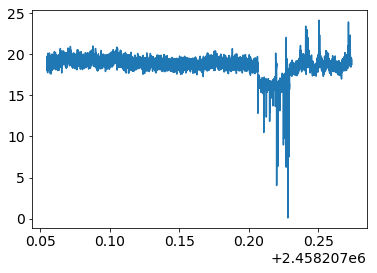

In [12]:
#nitrate
reload(sc)
nit_df = pd.read_table(nit, delimiter=',', header=14, engine='python')
nit_df = sc.clean_nitrate(nit_df)

#keep only certain columns
nit_df = nit_df.loc[:,['Julian_Date',
                         '0.00',
                         'Year',
                         'Month',
                         'Day',
                         'Hour',
                         'Minute',
                         'Second',
                         'Seconds_Elapsed']]

# limit the times
nit_df = nit_df.drop(nit_df[nit_df.Julian_Date < (0.055+2458207)].index)
nit_df = nit_df.drop(nit_df[nit_df.Julian_Date > (0.274+2458207)].index)
nit_df = nit_df.dropna()

# get the two sites
nit_fh = nit_df.drop(nit_df[nit_df.Julian_Date > (0.205+2458207)].index)
nit_nb = nit_df.drop(nit_df[nit_df.Julian_Date < (0.231+2458207)].index)

plt.plot(nit_df['Julian_Date'], nit_df['0.00'])

nit_df.head(2)

In [13]:
#pixhawk gpx info

# use the gpx parser
pix_df = gpxpy.parse(open(pix))

# get elements of the file
track = pix_df.tracks[0]
segment = track.segments[0]

# extract the points and other information
data = []
segment_length = segment.length_3d()
for i, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude, point.elevation, point.time, segment.get_speed(i)])

# put into a pandas dataframe
columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
p_df = pd.DataFrame(data, columns=columns)
p_df.head(5)

,Longitude,Latitude,Altitude,Time,Speed
0,-70.907060,41.638874,7.46,2018-03-29 08:59:31,NaN
1,-70.907059,41.638875,7.52,2018-03-29 08:59:31,0.079292
2,-70.907059,41.638875,7.59,2018-03-29 08:59:32,0.079292
3,-70.907059,41.638876,7.65,2018-03-29 08:59:32,NaN
4,-70.907058,41.638876,7.65,2018-03-29 08:59:32,NaN


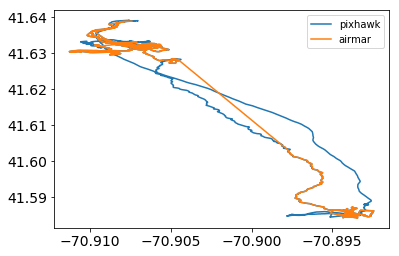

In [14]:
# Let's confirm that the airmar and the pixhawk line up
plt.plot(p_df['Longitude'], p_df['Latitude'], label='pixhawk')
plt.plot(air_df['lon_mod'], air_df['lat_mod'], label='airmar')
plt.legend()
plt.show()

In [15]:
# Let's add the timestamp info for the pixhawk
p_df.loc[:,'Year'] = p_df.apply(lambda x : int(x['Time'].year),axis=1)
p_df.loc[:,'Month'] = p_df.apply(lambda x : int(x['Time'].month),axis=1)
p_df.loc[:,'Day'] = p_df.apply(lambda x : int(x['Time'].day),axis=1)
p_df.loc[:,'Hour'] = p_df.apply(lambda x : float(x['Time'].hour+4.),axis=1)
p_df.loc[:,'Minute'] = p_df.apply(lambda x : float(x['Time'].minute),axis=1)
p_df.loc[:,'Second'] = p_df.apply(lambda x : float(x['Time'].second),axis=1)

p_df.head(2)

,Longitude,Latitude,Altitude,Time,Speed,Year,Month,Day,Hour,Minute,Second
0,-70.907060,41.638874,7.46,2018-03-29 08:59:31,NaN,2018,3,29,12.0,59.0,31.0
1,-70.907059,41.638875,7.52,2018-03-29 08:59:31,0.079292,2018,3,29,12.0,59.0,31.0


In [16]:
# Now let's add the Julian_Date element and trim the set to match the rest
p_df = sc.global_time_column(p_df)

# limit the times
p_df = p_df.drop(p_df[p_df.Julian_Date < (0.055+2458207)].index)
p_df = p_df.drop(p_df[p_df.Julian_Date > (0.274+2458207)].index)

# get the two sites
p_fh = p_df.drop(p_df[p_df.Julian_Date > (0.205+2458207)].index)
p_nb = p_df.drop(p_df[p_df.Julian_Date < (0.231+2458207)].index)

p_df.head(2)

,Longitude,Latitude,Altitude,Time,Speed,Year,Month,Day,Hour,Minute,Second,Julian_Date
2901,-70.907424,41.63876,5.06,2018-03-29 09:19:12,0.085968,2018,3,29,13.0,19.0,12.0,2458207.055
2902,-70.907425,41.63876,5.06,2018-03-29 09:19:12,NaN,2018,3,29,13.0,19.0,12.0,2458207.055


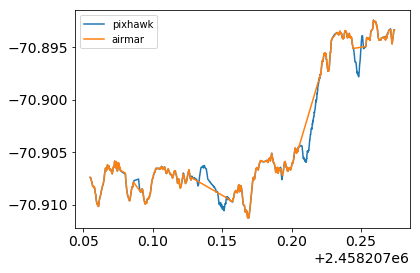

In [17]:
# And let's confirm again
plt.plot(p_df['Julian_Date'], p_df['Longitude'], label='pixhawk')
plt.plot(air_df['Julian_Date'], air_df['lon_mod'], label='airmar')
plt.legend()
plt.show()

In [18]:
#******************
# Only run this cell is new CSVs need to be generated!
# Generates instrument only files
#******************

ctd_df.to_csv('data/clean/ctd.csv')
ctd_fh.to_csv('data/clean/ctd_fh.csv')
ctd_nb.to_csv('data/clean/ctd_nb.csv')

nit_df.to_csv('data/clean/nit.csv')
nit_fh.to_csv('data/clean/nit_fh.csv')
nit_nb.to_csv('data/clean/nit_nb.csv')

op_df.to_csv('data/clean/op.csv')
op_fh.to_csv('data/clean/op_fh.csv')
op_nb.to_csv('data/clean/op_nb.csv')

gga_df.to_csv('data/clean/gga.csv')
gga_fh.to_csv('data/clean/gga_fh.csv')
gga_nb.to_csv('data/clean/gga_nb.csv')

air_df.to_csv('data/clean/air.csv')
air_fh.to_csv('data/clean/air_fh.csv')
air_nb.to_csv('data/clean/air_nb.csv')

p_df.to_csv('data/clean/p.csv')
p_fh.to_csv('data/clean/p_fh.csv')
p_nb.to_csv('data/clean/p_nb.csv')

## Geolocating Raw Data
Each instrument will now be combined with the pixhawk geolocation frame. Interpolation will happen with respect to the sensor timestamp (so the location will be interpolated, rather than the sensor information).

In [34]:
#index frames by Julian Date
ctd_jd = ctd_df.set_index('Julian_Date')
nit_jd = nit_df.set_index('Julian_Date')
op_jd = op_df.set_index('Julian_Date')
gga_jd = gga_df.set_index('Julian_Date')
air_jd = air_df.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')
p_jd = p_df.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')

In [35]:
# CTD
temp = pd.concat([ctd_jd, p_jd],
                 axis=1,
                 keys=['ctd', 'p'])
inter = temp.interpolate()
ind = ctd_jd.index
ctd_pix = inter.loc[ind]

In [36]:
# GGA
temp = pd.concat([gga_jd, p_jd],
                 axis=1,
                 keys=['gga', 'p'])
inter = temp.interpolate()
ind = gga_jd.index
gga_pix = inter.loc[ind]

In [43]:
# Nit
temp = pd.concat([nit_jd, p_jd],
                 axis=1,
                 keys=['nit', 'p'])
inter = temp.interpolate()
ind = nit_jd.index
nit_pix = inter.loc[ind]

In [37]:
# Op
temp = pd.concat([op_jd, p_jd],
                 axis=1,
                 keys=['op', 'p'])
inter = temp.interpolate()
ind = op_jd.index
op_pix = inter.loc[ind]

In [38]:
# air
temp = pd.concat([air_jd, p_jd],
                 axis=1,
                 keys=['air', 'p'])
inter = temp.interpolate()
ind = air_jd.index
air_pix = inter.loc[ind]

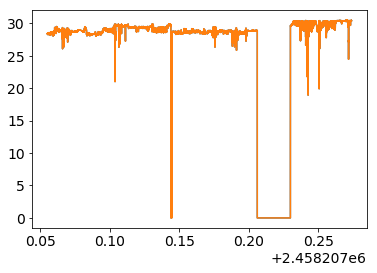

In [41]:
plt.plot(ctd_df['Julian_Date'], ctd_df['Salinity'])
plt.plot(ctd_pix.index, ctd_pix['ctd']['Salinity'])

In [44]:
#******************
# Only run this cell is new CSVs need to be generated!
# Will generate all of the geolocated data for instruments
#******************

ctd_pix.to_csv('data/clean/ctd_geo.csv', sep=',')
gga_pix.to_csv('data/clean/gga_geo.csv', sep=',')
nit_pix.to_csv('data/clean/nit_geo.csv', sep=',')
air_pix.to_csv('data/clean/air_geo.csv', sep=',')
op_pix.to_csv('data/clean/op_geo.csv', sep=',')

## Creating a Common Frame

Now, all instruments will be combined into one frame, and interpolation will occur with respect to the CTD timestamp (so CTD data will be the true representation, all other values will be linearly interpolated onto this sampling rate).

In [19]:
#index frames by Julian Date
ctd_jd = ctd_df.set_index('Julian_Date')
nit_jd = nit_df.set_index('Julian_Date')
op_jd = op_df.set_index('Julian_Date')
gga_jd = gga_df.set_index('Julian_Date')
air_jd = air_df.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')
p_jd = p_df.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')

In [20]:
#combine
temp = pd.concat([ctd_jd, gga_jd, nit_jd, op_jd, air_jd, p_jd],
                 axis=1,
                 keys=['ctd', 'gga', 'nit', 'op', 'air', 'p'])

#interpolate
inter_temp = temp.interpolate()

#Resample to index of CTD
ctd_index = ctd_jd.index
complete_data = inter_temp.loc[ctd_index]

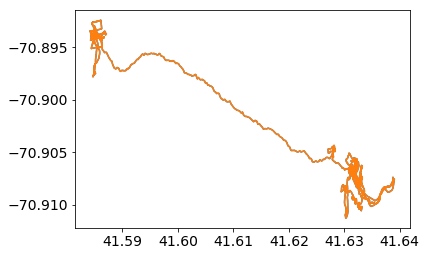

In [21]:
plt.plot(complete_data['p']['Latitude'], complete_data['p']['Longitude'])
plt.plot(p_df['Latitude'], p_df['Longitude'])

In [22]:
#******************
# Only run this cell is new CSVs need to be generated!
# Will generate a complete data set interpolated onto the sampling rate of the CTD
#******************

complete_data.to_csv('data/clean/all_interpolated.csv', sep=',')

### Now, for Each Deployment

In [26]:
#index frames by Julian Date
ctd_fh_jd = ctd_fh.set_index('Julian_Date')
nit_fh_jd = nit_fh.set_index('Julian_Date')
op_fh_jd = op_fh.set_index('Julian_Date')
gga_fh_jd = gga_fh.set_index('Julian_Date')
air_fh_jd = air_fh.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')
p_fh_jd = p_fh.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')

In [27]:
#combine
temp = pd.concat([ctd_fh_jd, gga_fh_jd, nit_fh_jd, op_fh_jd, air_fh_jd, p_fh_jd],
                 axis=1,
                 keys=['ctd', 'gga', 'nit', 'op', 'air', 'p'])

#interpolate
inter_temp = temp.interpolate()

#Resample to index of CTD
ctd_index = ctd_fh_jd.index
fairhaven_data = inter_temp.loc[ctd_index]

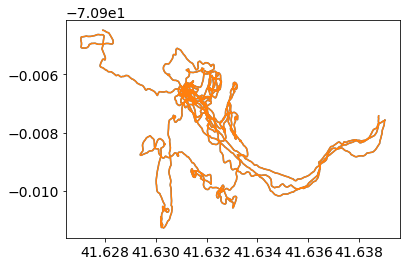

In [28]:
plt.plot(fairhaven_data['p']['Latitude'], fairhaven_data['p']['Longitude'])
plt.plot(p_fh['Latitude'], p_fh['Longitude'])

In [29]:
#******************
# Only run this cell is new CSVs need to be generated!
# Will generate CTD sample rate interpolated dataset
#******************

fairhaven_data.to_csv('data/clean/fh_interpolated.csv', sep=',')

In [30]:
#index frames by Julian Date
ctd_nb_jd = ctd_nb.set_index('Julian_Date')
nit_nb_jd = nit_nb.set_index('Julian_Date')
op_nb_jd = op_nb.set_index('Julian_Date')
gga_nb_jd = gga_nb.set_index('Julian_Date')
air_nb_jd = air_nb.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')
p_nb_jd = p_nb.drop_duplicates(subset='Julian_Date', keep='last').set_index('Julian_Date')

In [31]:
#combine
temp = pd.concat([ctd_nb_jd, gga_nb_jd, nit_nb_jd, op_nb_jd, air_nb_jd, p_nb_jd],
                 axis=1,
                 keys=['ctd', 'gga', 'nit', 'op', 'air', 'p'])

#interpolate
inter_temp = temp.interpolate()

#Resample to index of gps
ctd_index = ctd_nb_jd.index
newbedford_data = inter_temp.loc[ctd_index]

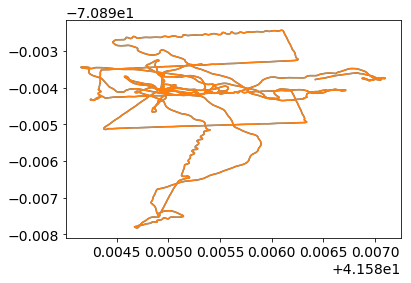

In [32]:
plt.plot(newbedford_data['p']['Latitude'], newbedford_data['p']['Longitude'])
plt.plot(p_nb['Latitude'], p_nb['Longitude'])

In [33]:
#******************
# Only run this cell is new CSVs need to be generated!
# Will generate a CTD sa,ple rate interpolated data set for new bedford
#******************

newbedford_data.to_csv('data/clean/nb_interpolated.csv', sep=',')

And that's a wrap! All data should now be available for plotting. See the other notebook for these visualizations.